In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd


In [362]:
data = pd.read_csv('us_state_vaccinations.csv')
data

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,2021-03-25,Wyoming,242919.0,350735.0,146634.0,16.54,41.97,95709.0,25.34,60.60,7495.0,4124.0,7126.0,0.693
5024,2021-03-26,Wyoming,243336.0,351435.0,146888.0,16.56,42.04,95871.0,25.38,60.72,417.0,3229.0,5579.0,0.692
5025,2021-03-27,Wyoming,243604.0,353975.0,147098.0,16.61,42.09,96104.0,25.42,61.16,268.0,3230.0,5581.0,0.688
5026,2021-03-28,Wyoming,244038.0,353975.0,147413.0,16.66,42.17,96398.0,25.47,61.16,434.0,3243.0,5603.0,0.689


In [363]:
data['date'] = data.date.apply(pd.to_datetime)

In [364]:
data["month"] = pd.to_datetime(data.date, format='%b', errors='coerce').dt.month
data = data.dropna()
data1 = data[['total_vaccinations', 'location', 'date', 'month']]
data1.rename(columns={'location':'state'}, inplace=True)
data1.head()


/Users/sissilin/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,total_vaccinations,state,date,month
1,84040.0,Alabama,2021-01-13,1
3,100567.0,Alabama,2021-01-15,1
7,130795.0,Alabama,2021-01-19,1
8,139200.0,Alabama,2021-01-20,1
9,165919.0,Alabama,2021-01-21,1


In [372]:
data1.loc[data1['state']=='New York State', 'state'] = 'New York'
data1.state.unique()

/Users/sissilin/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Federated States of Micronesia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indian Health Svc', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Marshall Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Republic of Palau',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [373]:
pop = pd.read_csv('population.csv')
pop.head()
population = pop[['STATE', 'POPESTIMATE2019']]
population.rename(columns={'STATE':'state', 'POPESTIMATE2019':'pop'}, inplace=True)
population.head()
population.state.unique()

/Users/sissilin/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [374]:
df = population.merge(data1, on='state')
df.head()
df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [375]:
df['total_per_vac'] = df['total_vaccinations']/df['pop']
df[df['state']=='South Dakota']

,state,pop,total_vaccinations,date,month,total_per_vac
2909,South Dakota,884659,50712.0,2021-01-13,1,0.057324
2910,South Dakota,884659,57103.0,2021-01-15,1,0.064548
2911,South Dakota,884659,61113.0,2021-01-19,1,0.069081
2912,South Dakota,884659,62518.0,2021-01-20,1,0.070669
2913,South Dakota,884659,65377.0,2021-01-21,1,0.073901
...,...,...,...,...,...,...
2975,South Dakota,884659,445142.0,2021-03-25,3,0.503179
2976,South Dakota,884659,457075.0,2021-03-26,3,0.516668
2977,South Dakota,884659,471664.0,2021-03-27,3,0.533159
2978,South Dakota,884659,482516.0,2021-03-28,3,0.545426


In [376]:
states = df.state.unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [504]:
AL = df[df['state'] == 'Alabama']
AL = AL.loc[AL.groupby('month').date.idxmax()]
AL
AL['date'] = AL['date'].apply(lambda x: x.strftime('%Y-%m')) 
AL

,state,pop,total_vaccinations,date,month,total_per_vac
14,Alabama,4903185,353974.0,2021-01,1,0.072193
41,Alabama,4903185,942502.0,2021-02,2,0.192222
70,Alabama,4903185,1666585.0,2021-03,3,0.339898


14   2021-01-31
41   2021-02-28
70   2021-03-29
Name: date, dtype: datetime64[ns]

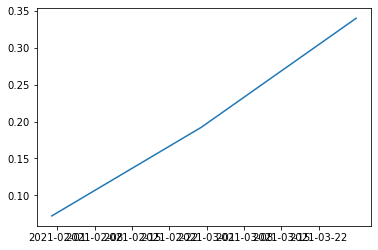

In [235]:
plt.plot(AL['date'], AL['total_per_vac'])

AL['date']

Text(0.5, 1.0, 'Alabama')

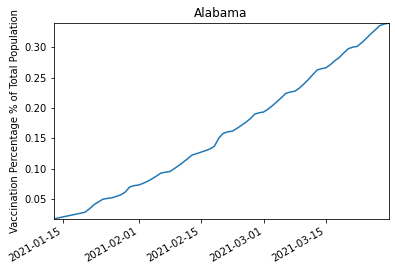

In [295]:
import matplotlib
plt.plot(AL['date'], AL['total_per_vac'])
#plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.gcf().autofmt_xdate()
plt.margins(x=0,y=0)
plt.ylabel('Vaccination Percentage % of Total Population')
plt.title('Alabama')

In [378]:
def plot_line_chart(state, df):
    state_df = df[df['state'] == state]
    plt.plot(state_df['date'], state_df['total_per_vac'])
    plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
    #plt.gcf().autofmt_xdate()
    plt.margins(x=0,y=0)
    plt.xlabel('Date by Year-Month')
    plt.ylabel('Vaccination Percentage % of Total Population')
    plt.title(state)
    plt.savefig(state)
    plt.show()

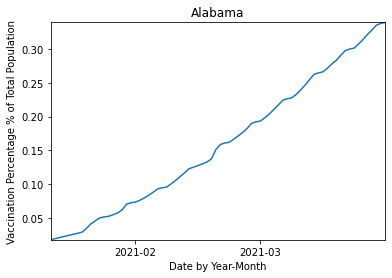

In [379]:
plot_line_chart('Alabama', df)

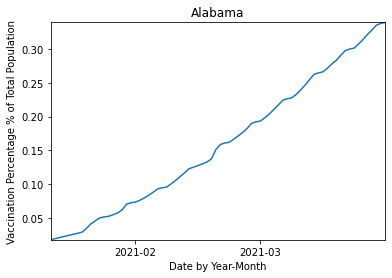

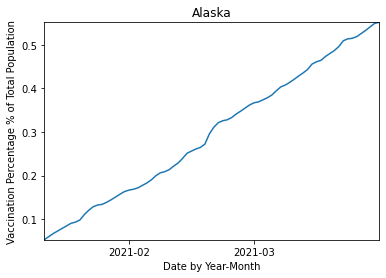

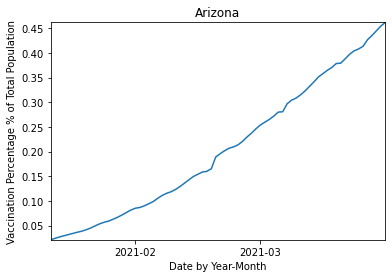

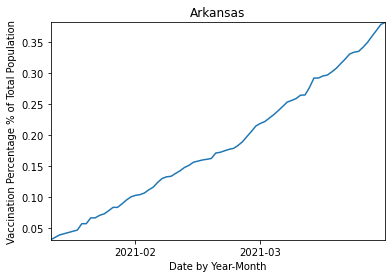

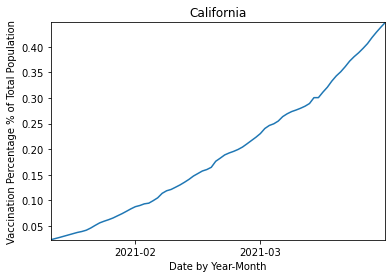

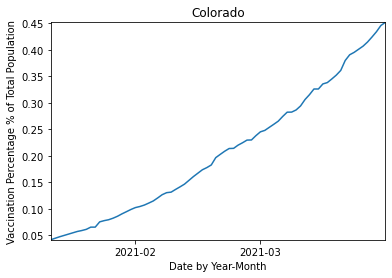

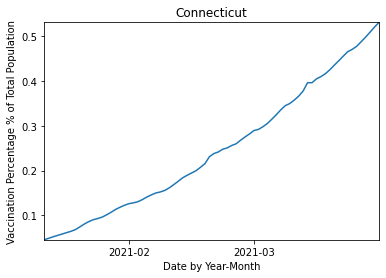

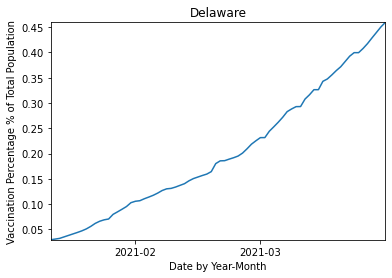

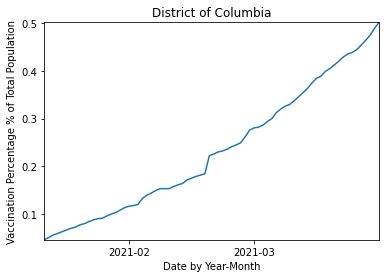

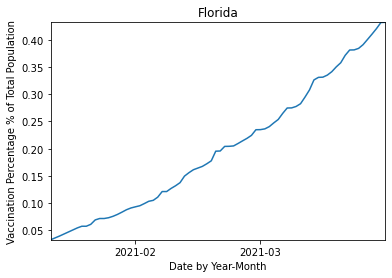

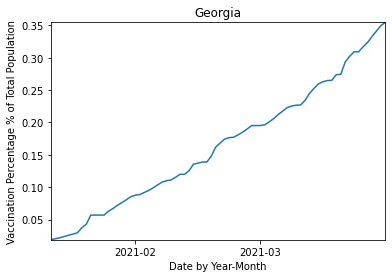

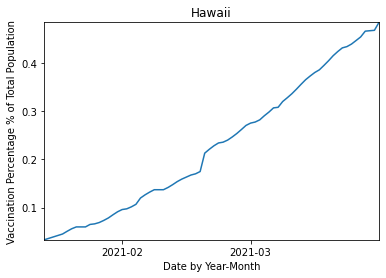

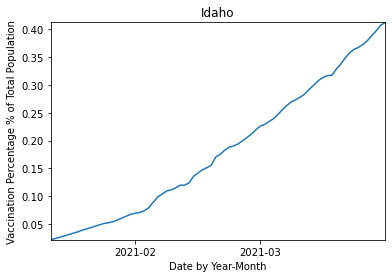

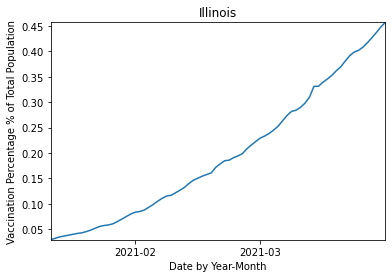

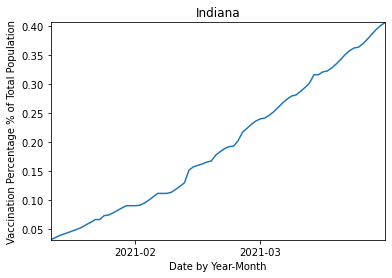

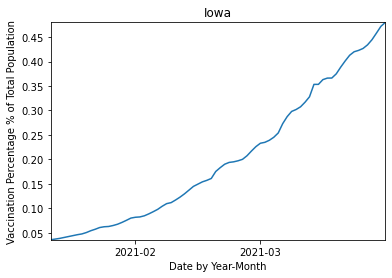

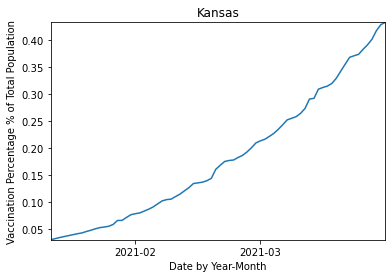

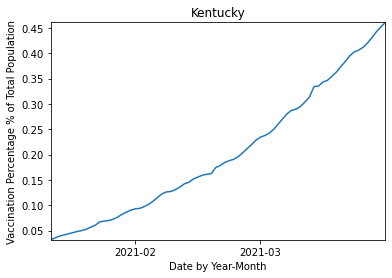

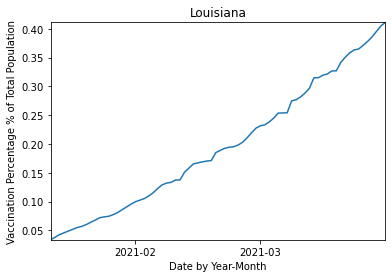

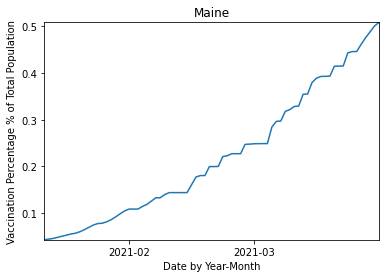

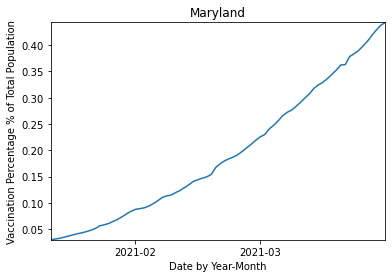

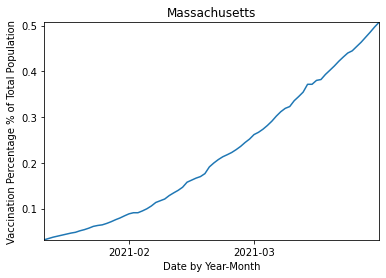

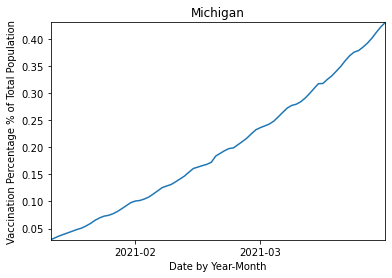

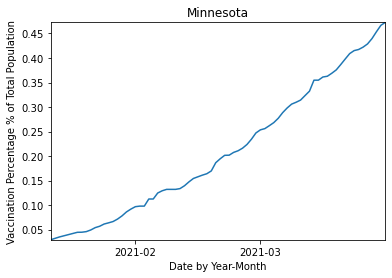

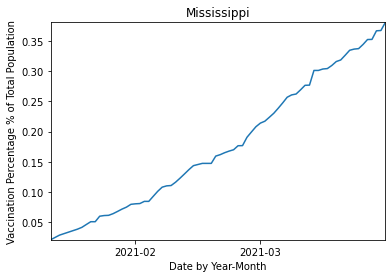

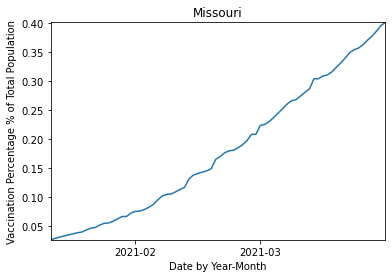

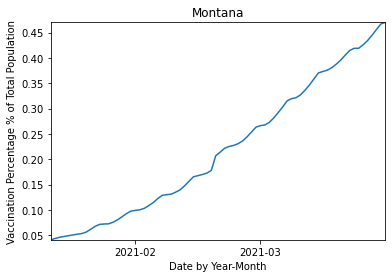

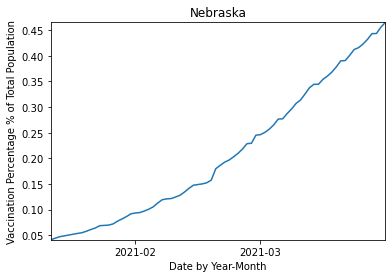

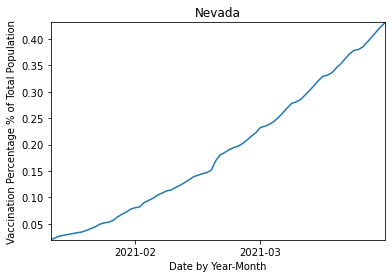

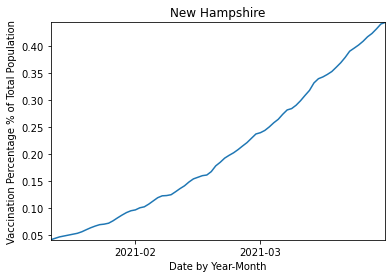

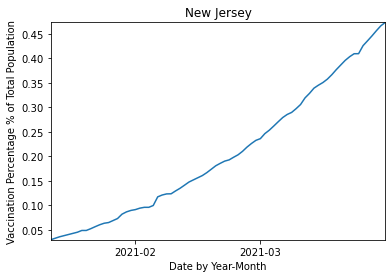

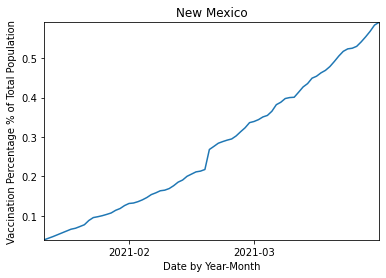

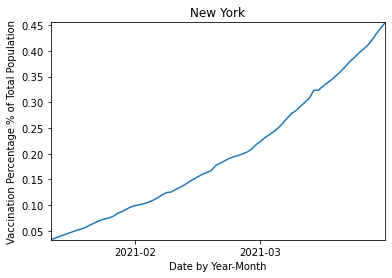

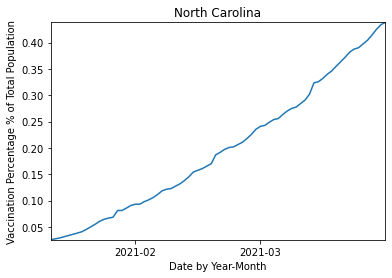

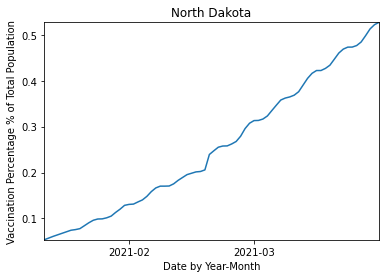

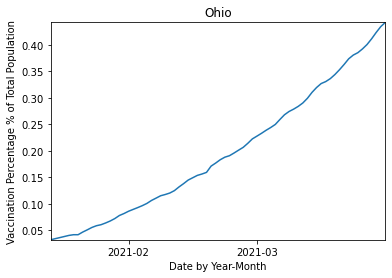

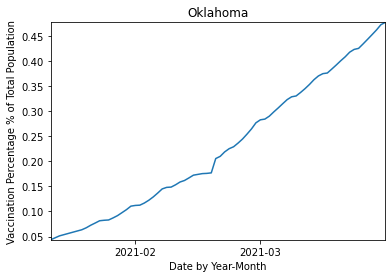

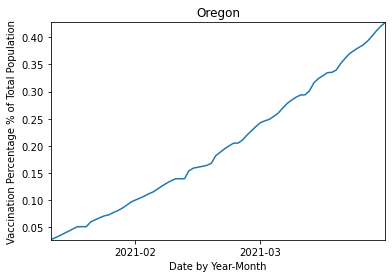

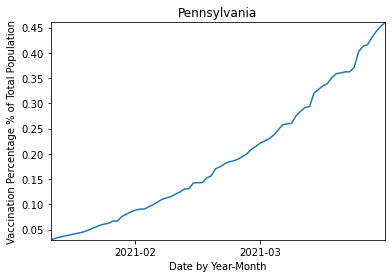

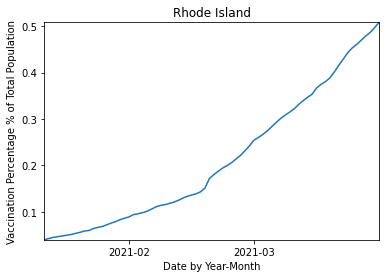

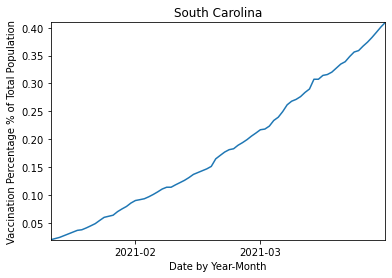

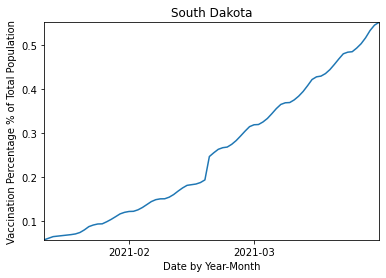

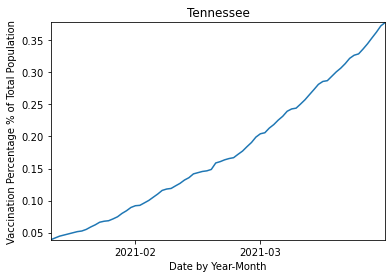

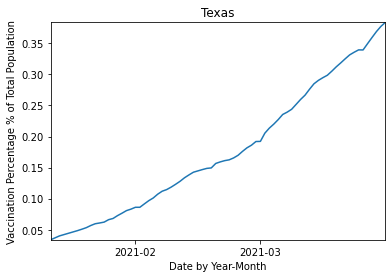

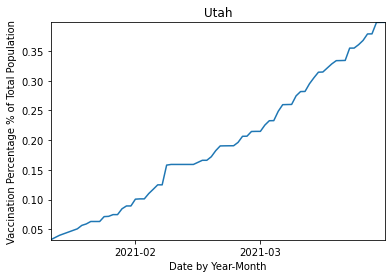

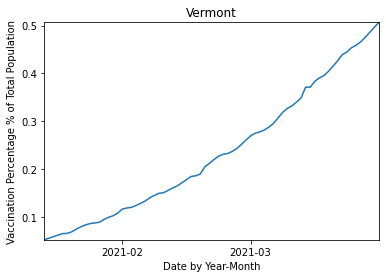

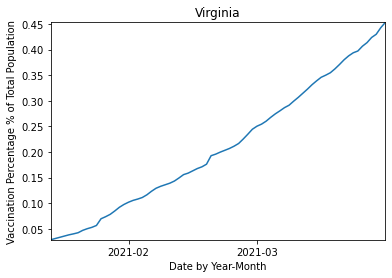

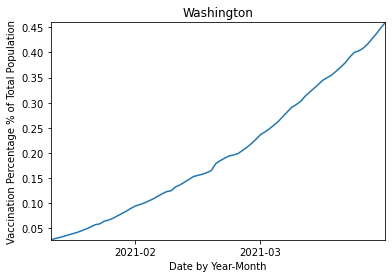

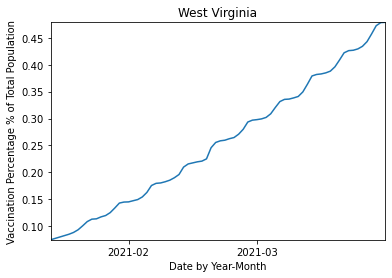

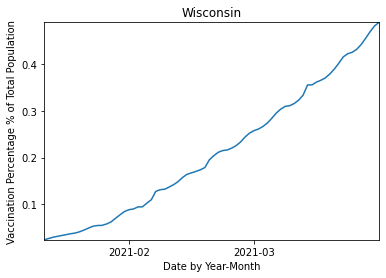

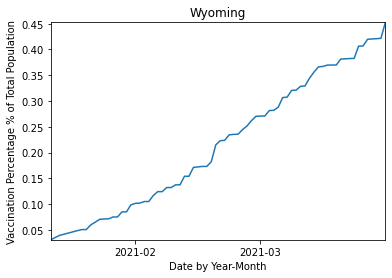

In [380]:
for state in states:
    plot_line_chart(state, df)
    

In [515]:
def plot_line_chart(state, df):
    state_df = df[df['state'] == state]
    state_df = state_df.loc[state_df.groupby('month').date.idxmax()]
    state_df['date'] = state_df['date'].apply(lambda x: x.strftime('%Y-%m')) 
    plt.plot(state_df['date'], state_df['total_per_vac'])
    #plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
    plt.gcf().autofmt_xdate()
    plt.margins(x=0,y=0)
    plt.ylabel('Vaccination Percentage of Total Population')
    plt.title(state)
    plt.savefig(state)
    plt.show()

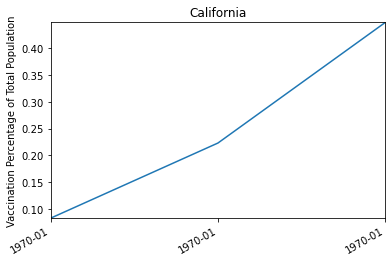

In [516]:
plot_line_chart('California', df)

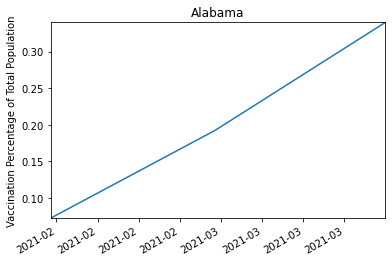

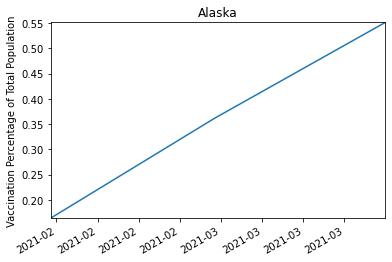

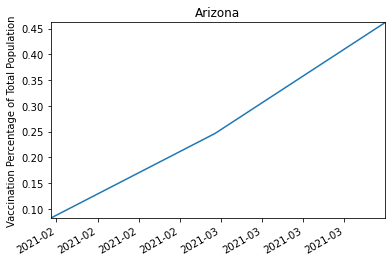

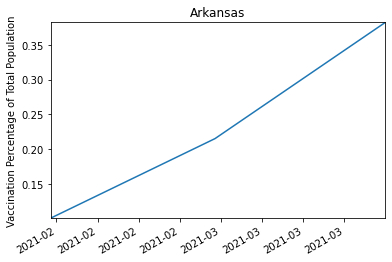

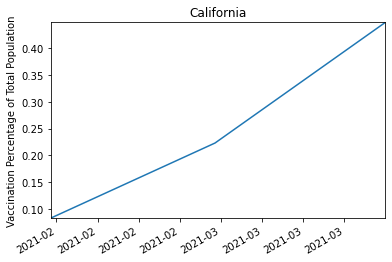

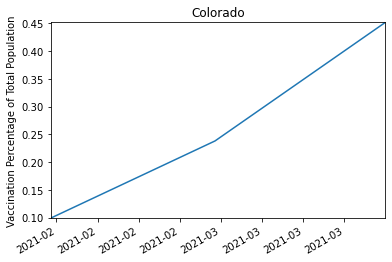

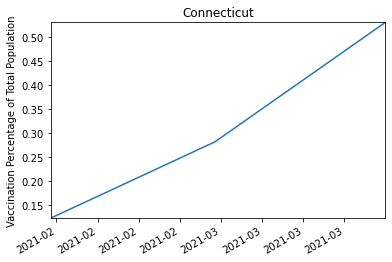

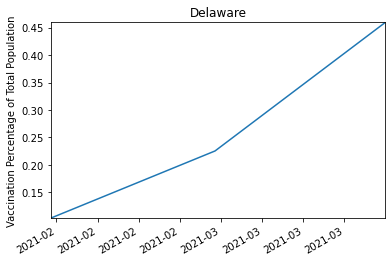

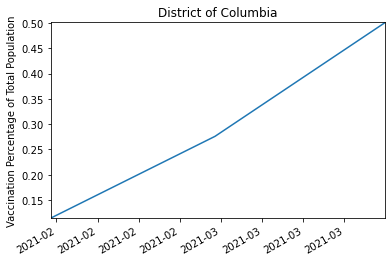

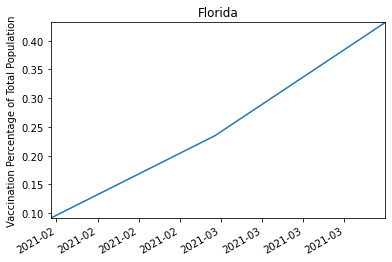

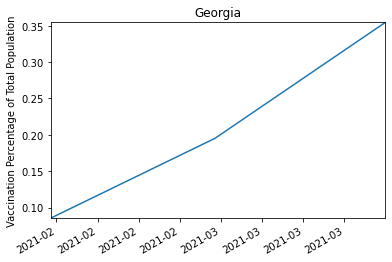

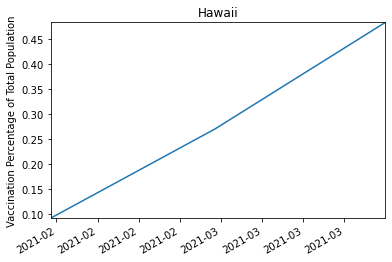

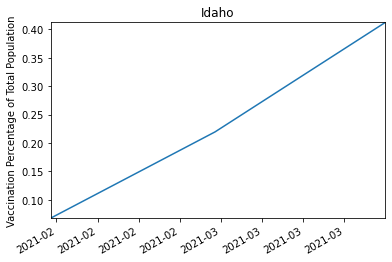

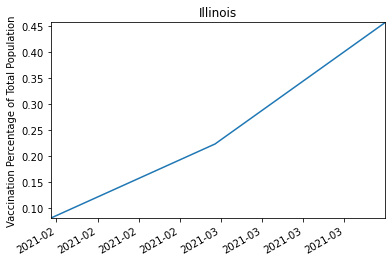

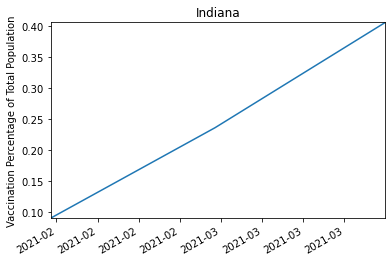

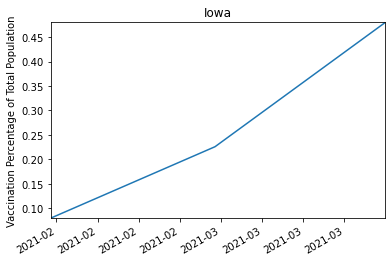

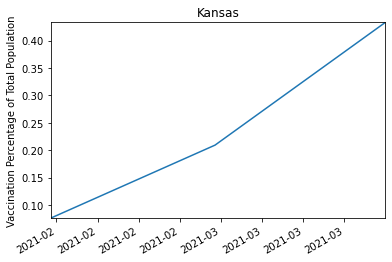

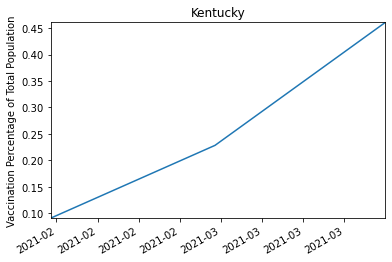

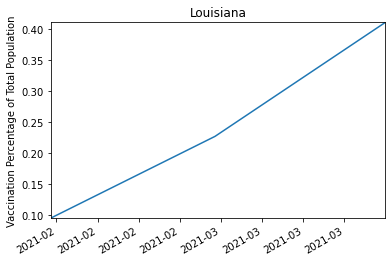

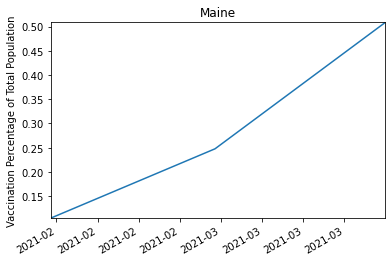

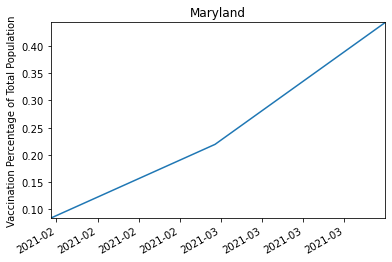

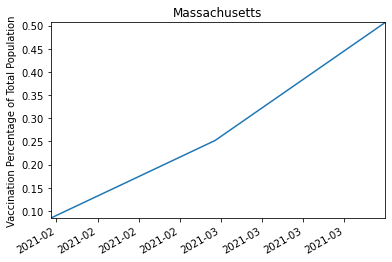

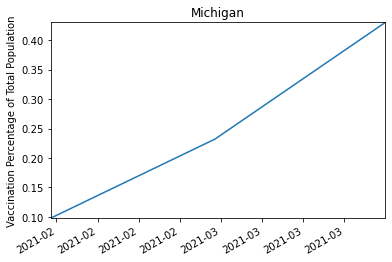

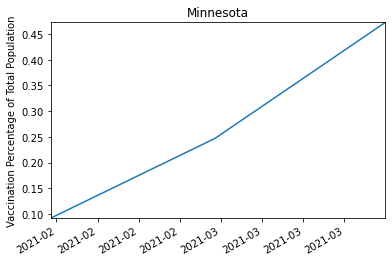

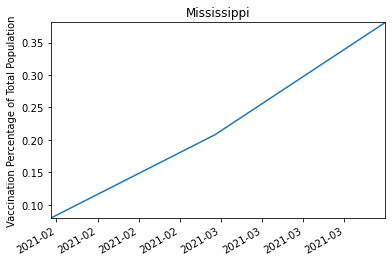

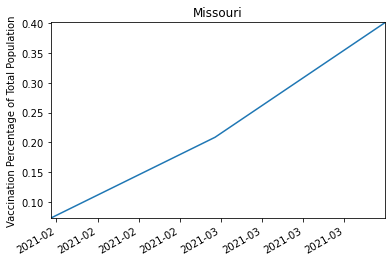

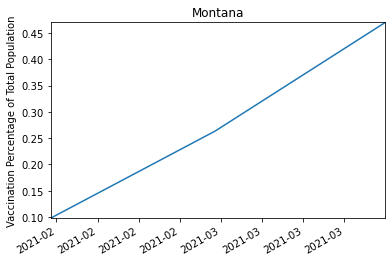

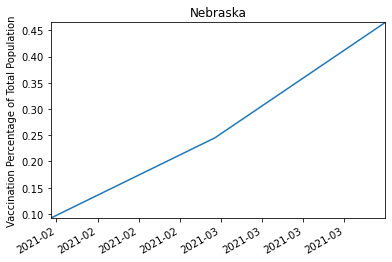

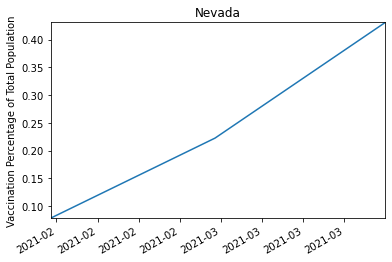

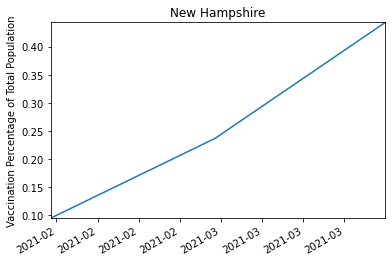

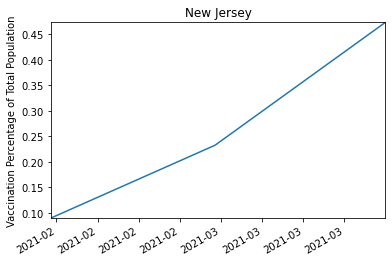

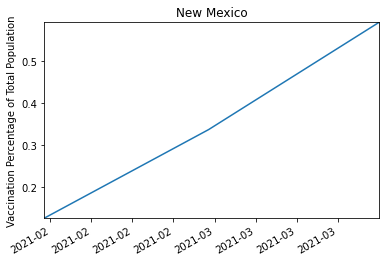

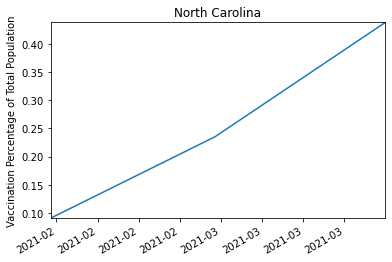

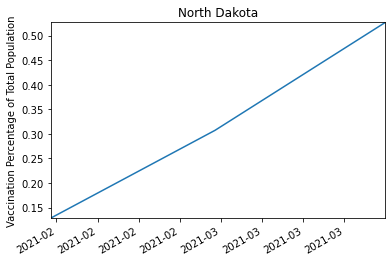

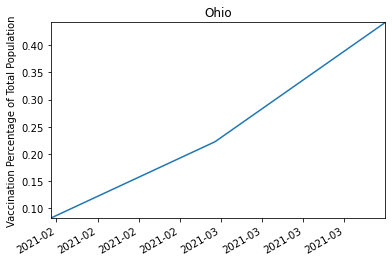

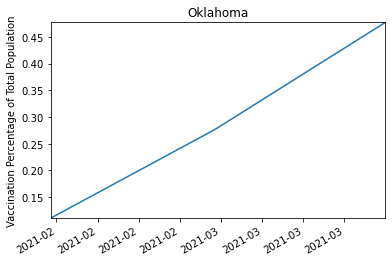

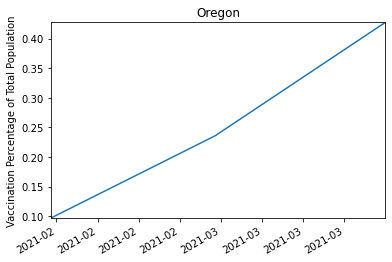

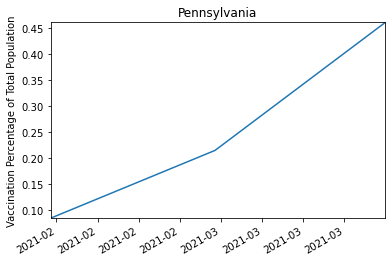

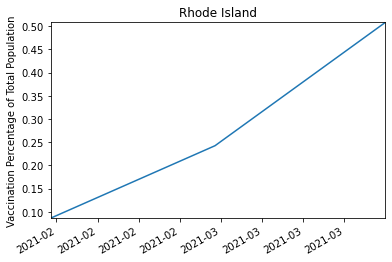

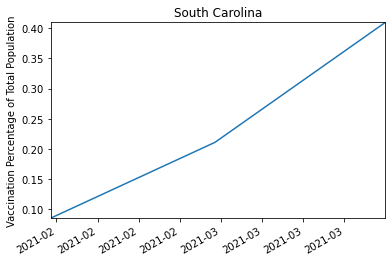

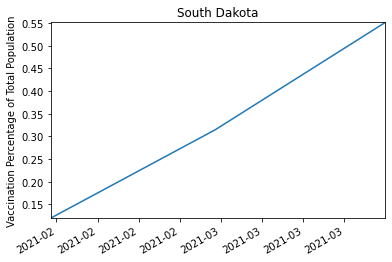

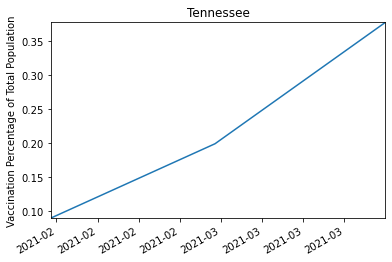

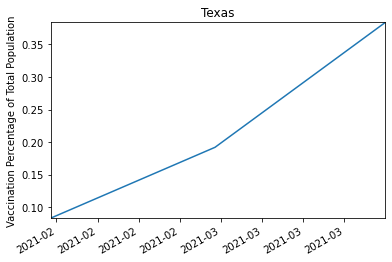

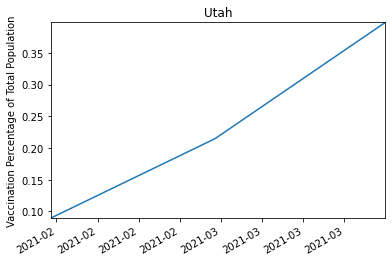

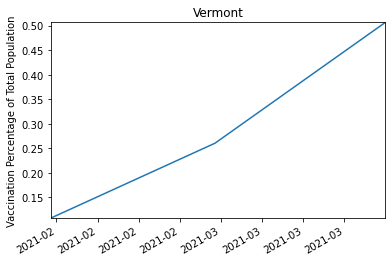

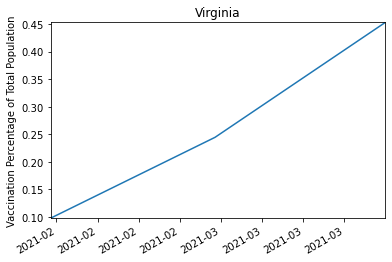

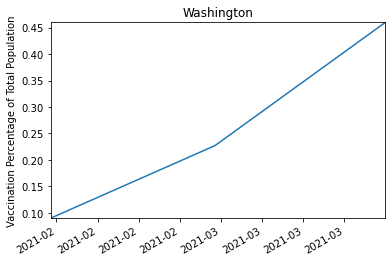

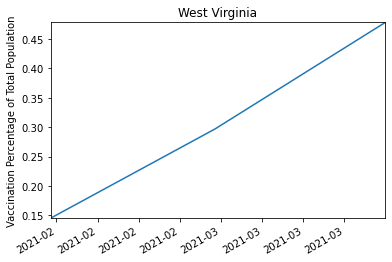

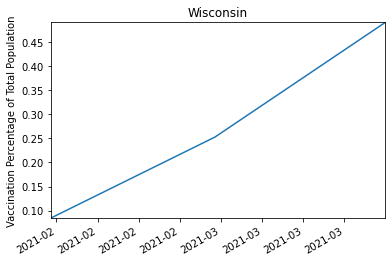

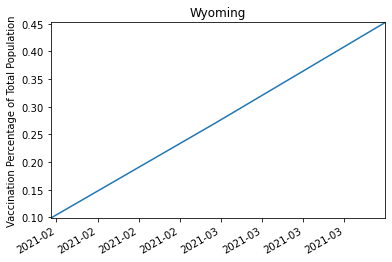

In [339]:
for state in states:
    plot_line_chart(state, df)
    print()

In [445]:
def plot_line_chart(state, df):
    state_df = df[df['state'] == state]
    #state_df = state_df.loc[state_df.groupby('month').date.idxmax()]
    plt.plot(state_df['date'], state_df['total_per_vac']*100)
    plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
    #plt.gcf().autofmt_xdate()
    plt.margins(x=0,y=0)
    plt.xlabel('Date by Year-Month')
    plt.ylabel('% of Total Population Vaccinated')
    plt.xlim('2021-01', '2021-04')
    plt.ylim(0, 100)
    plt.title(state)
    plt.savefig(state)
    plt.show()

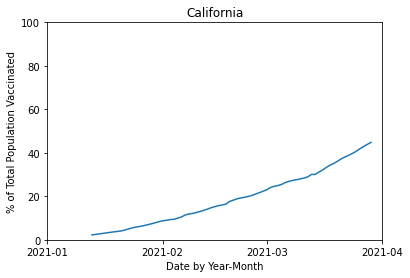

In [446]:
plot_line_chart('California', df)

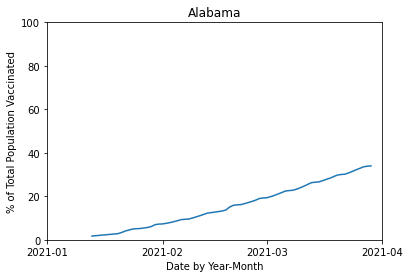

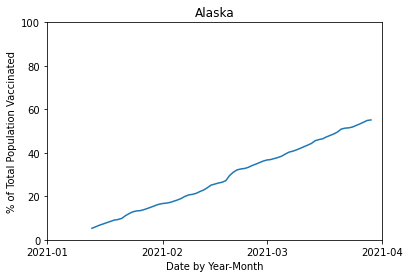

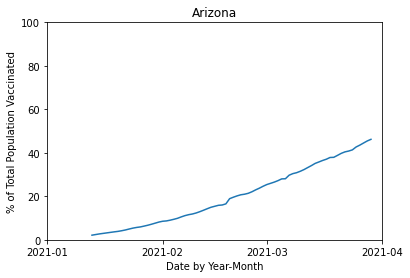

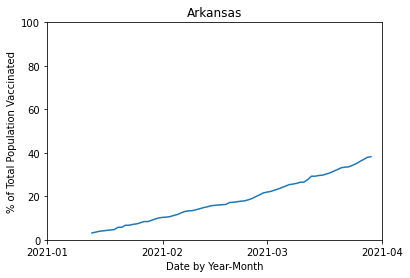

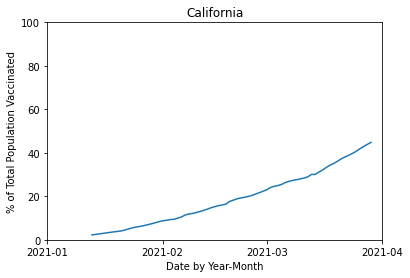

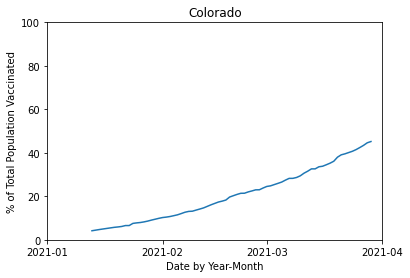

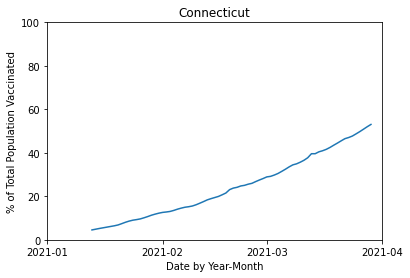

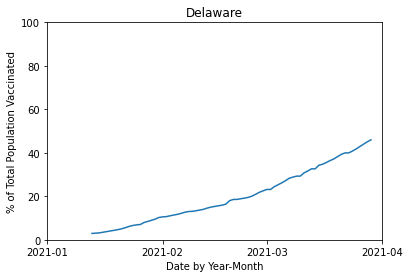

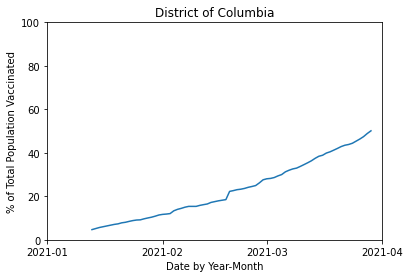

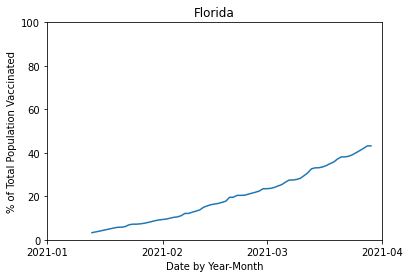

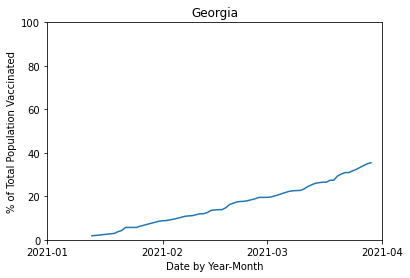

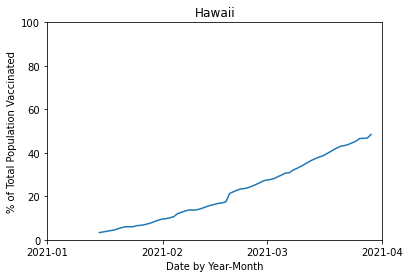

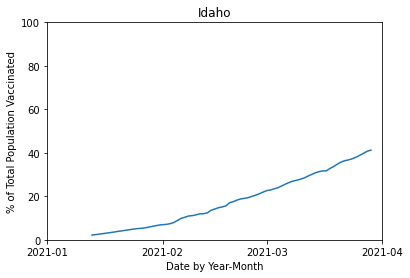

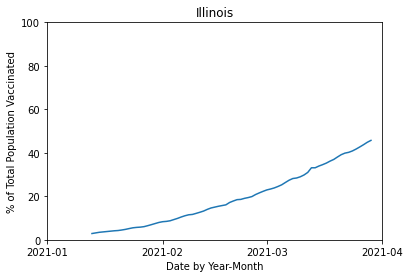

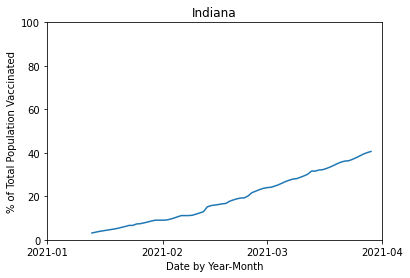

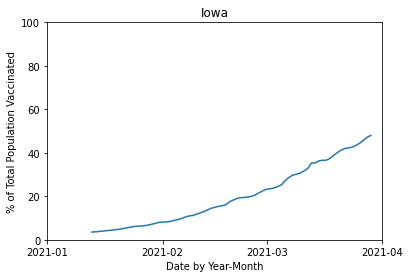

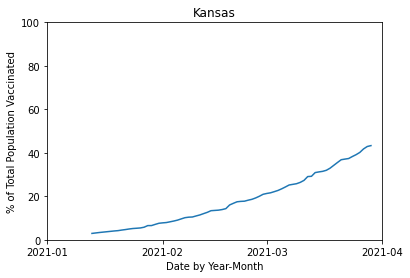

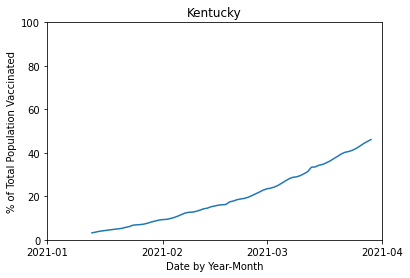

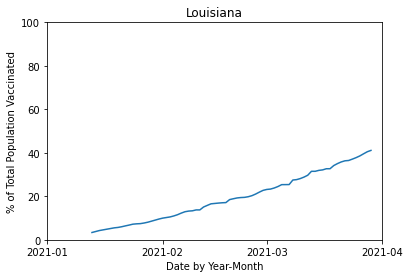

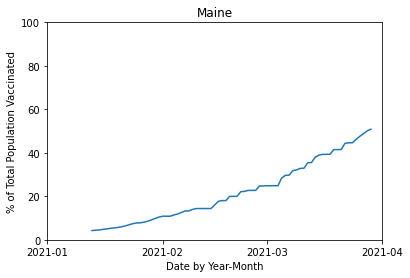

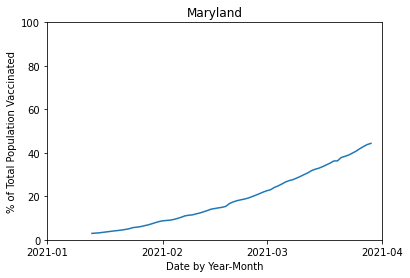

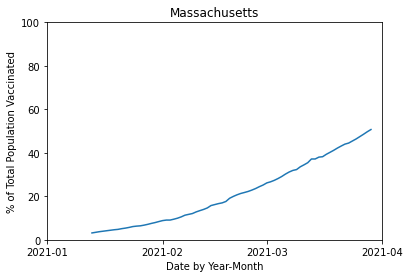

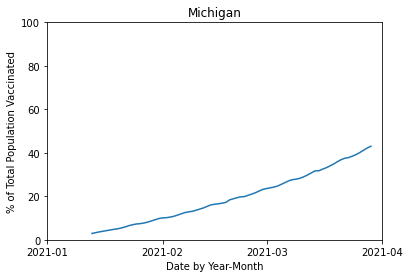

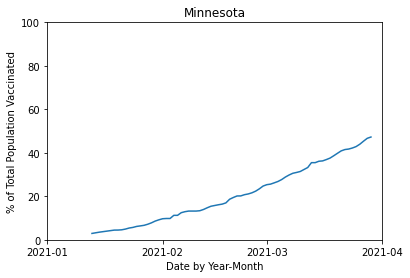

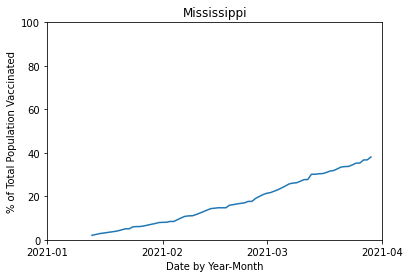

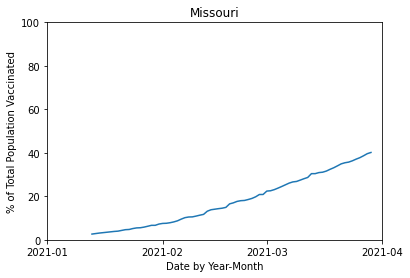

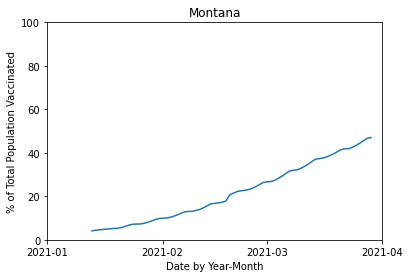

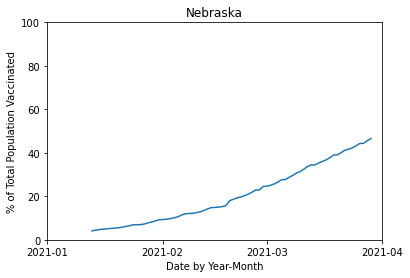

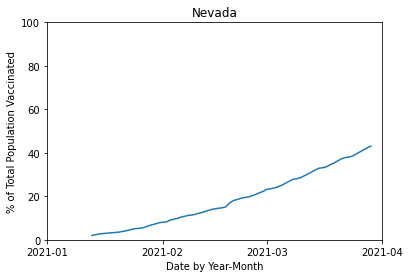

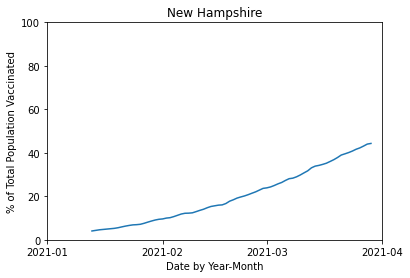

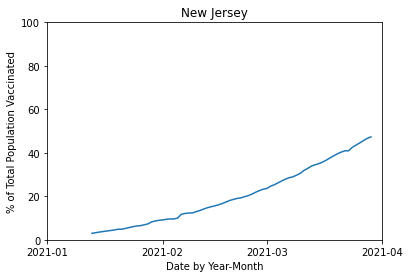

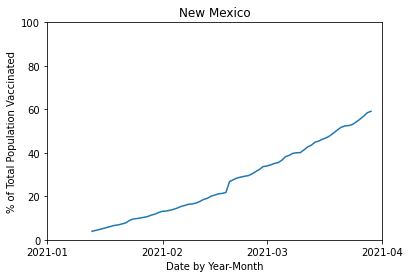

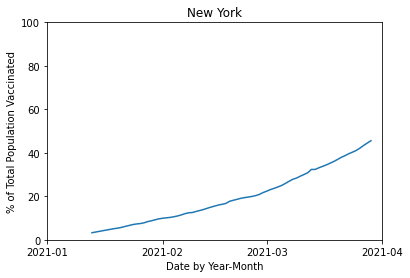

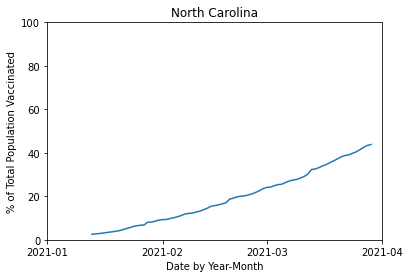

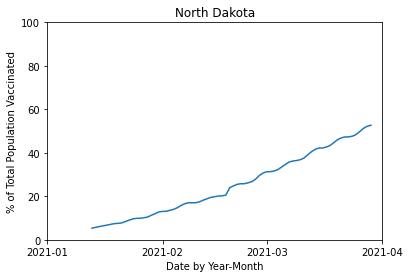

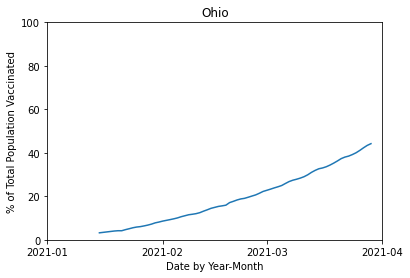

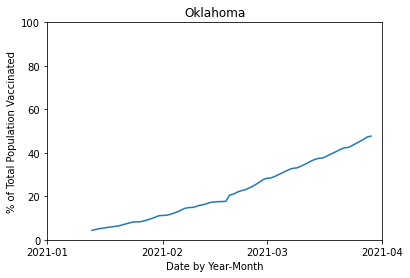

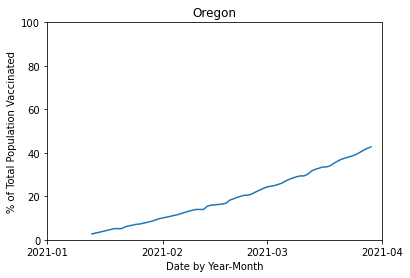

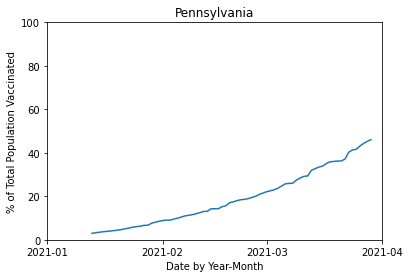

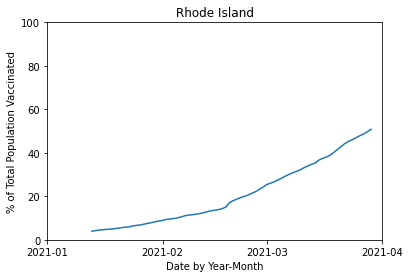

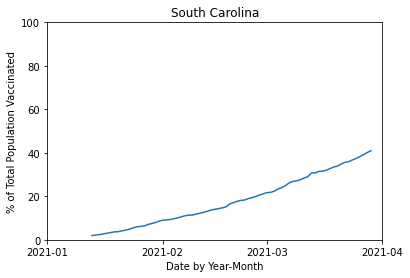

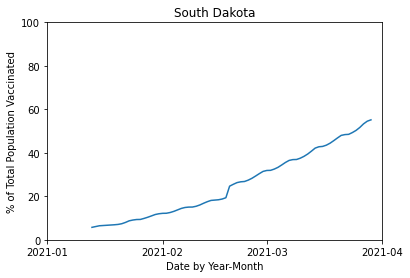

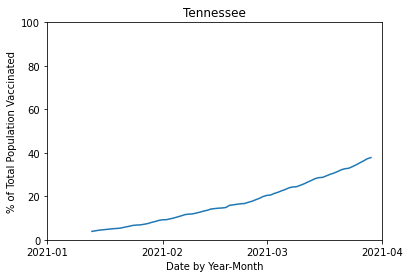

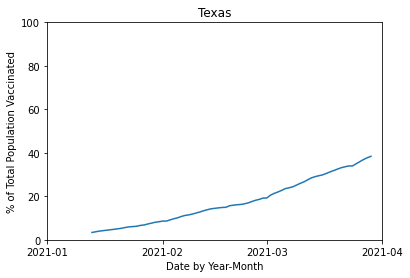

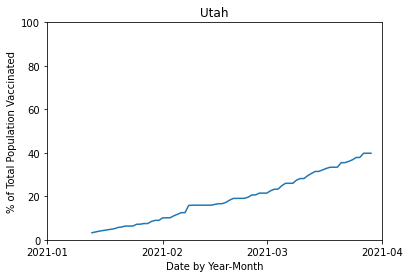

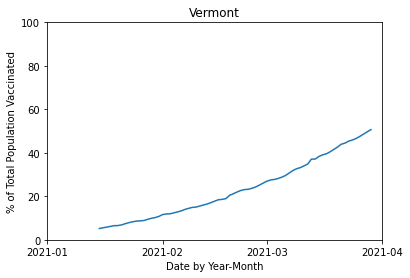

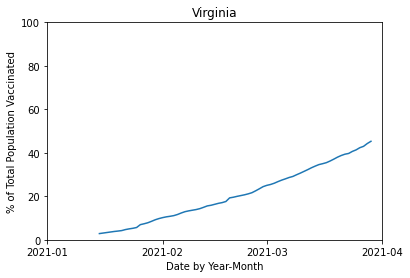

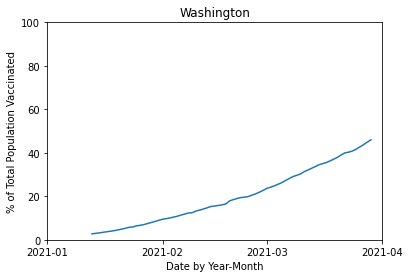

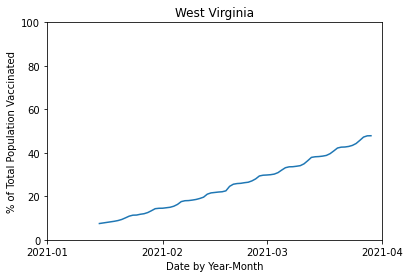

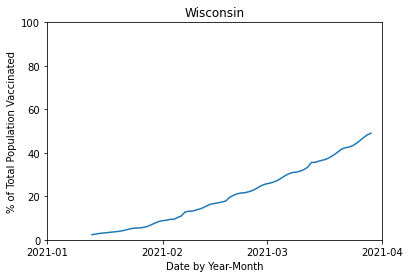

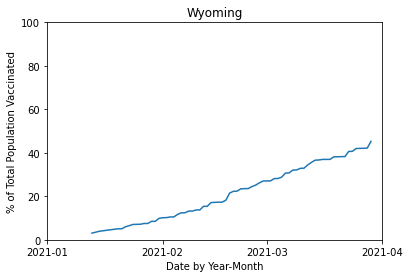

In [447]:
for state in states:
    plot_line_chart(state, df)
    print()

In [509]:
def plot_line_chart(state, df):
    state_df = df[df['state'] == state]
    state_df = state_df.loc[state_df.groupby('month').date.idxmax()]
    state_df['date'] = state_df['date'].apply(lambda x: x.strftime('%Y-%m'))     
    plt.bar(state_df['date'], state_df['total_per_vac']*100)
    plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
    #plt.gcf().autofmt_xdate()
    plt.margins(x=0,y=0)
    plt.xlabel('Date by Year-Month')
    plt.ylabel('% of Total Population Vaccinated')
    plt.xlim('2021-01', '2021-03')
    plt.ylim(0, 100)
    plt.title(state)
    #plt.savefig(state)
    plt.show()

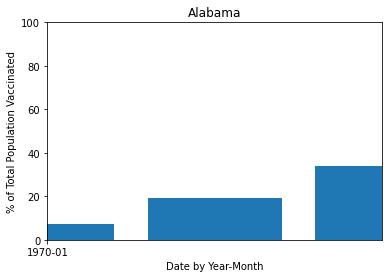

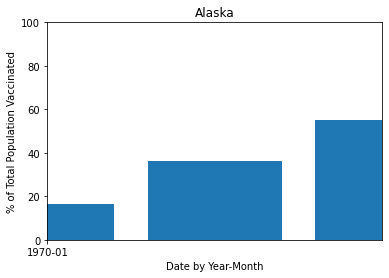

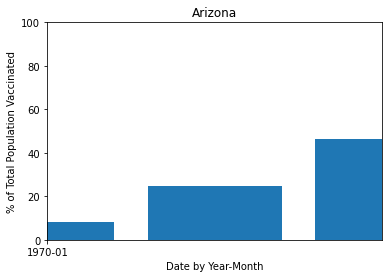

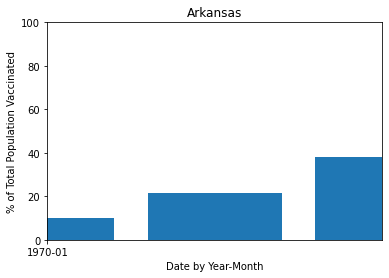

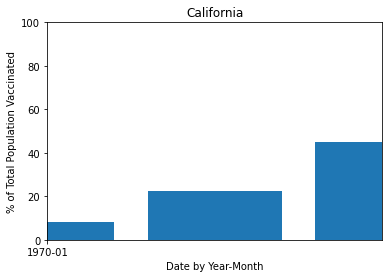

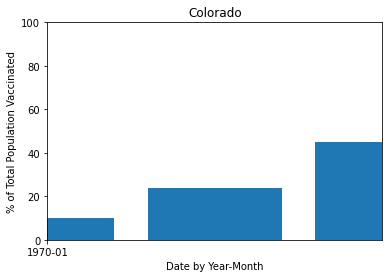

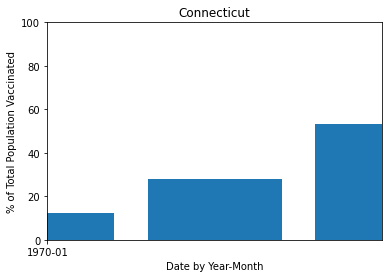

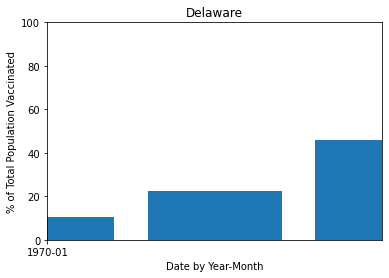

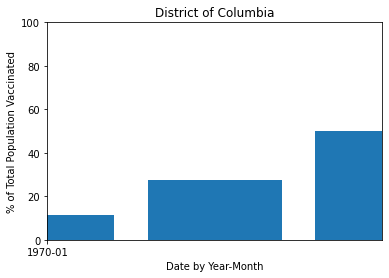

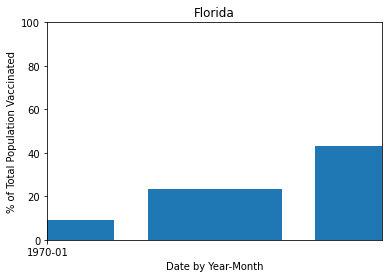

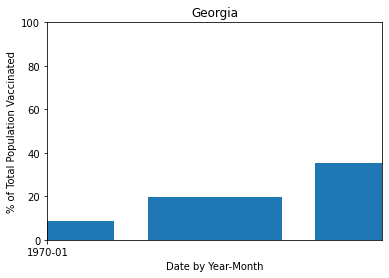

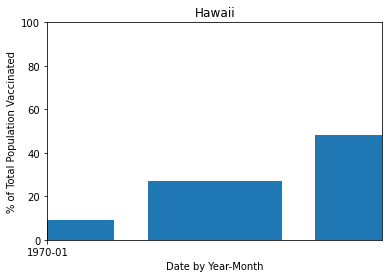

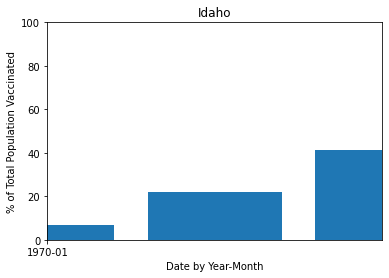

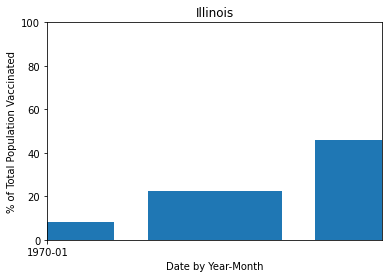

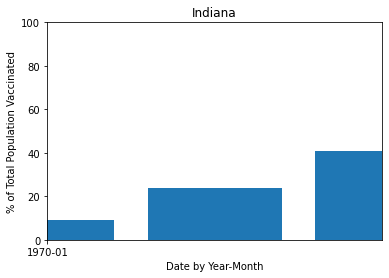

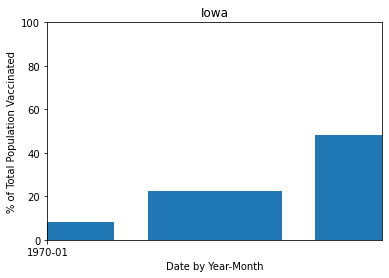

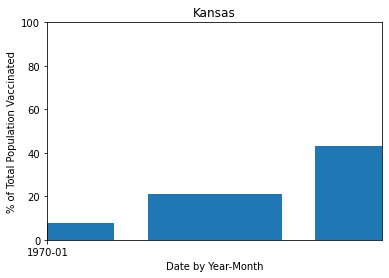

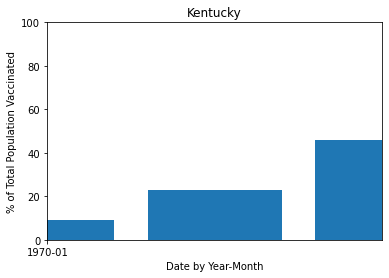

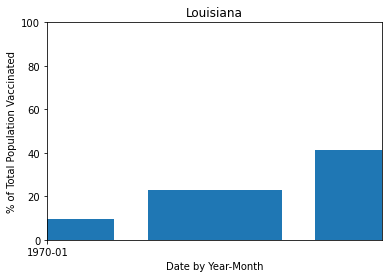

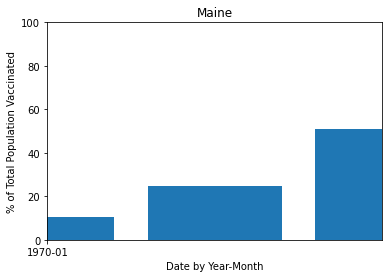

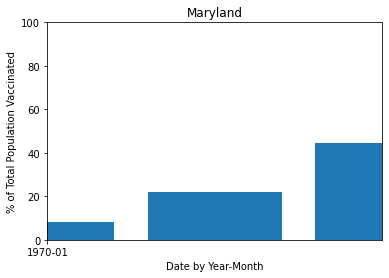

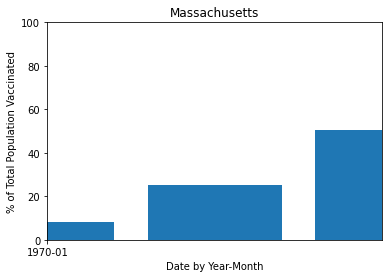

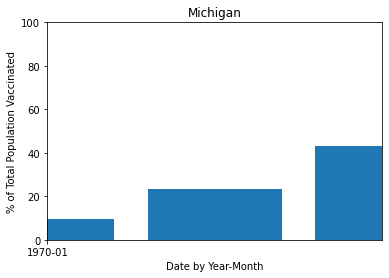

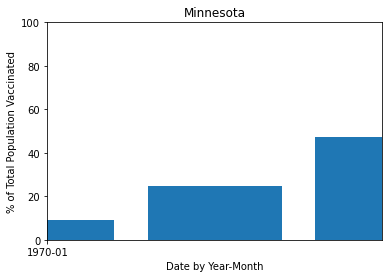

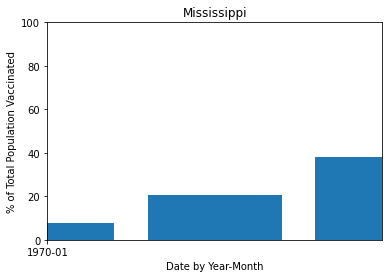

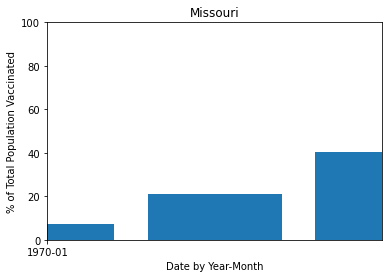

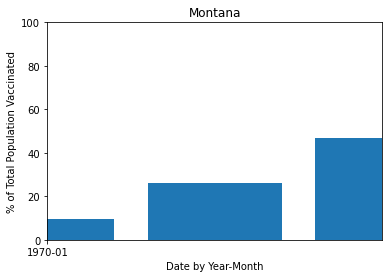

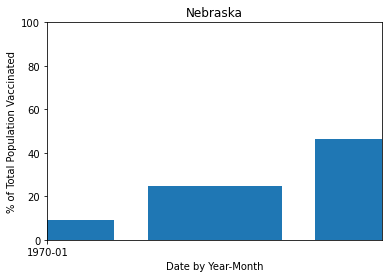

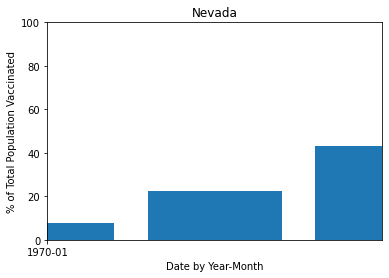

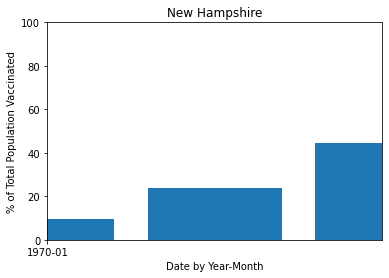

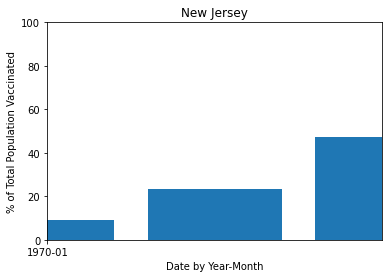

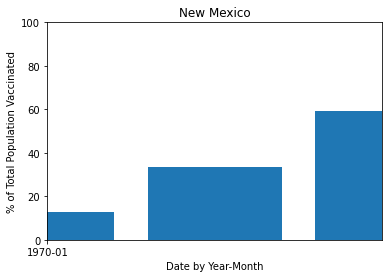

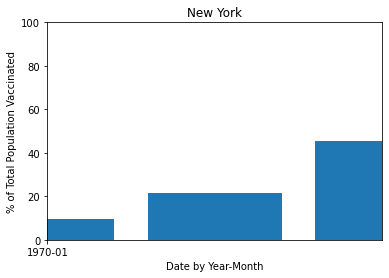

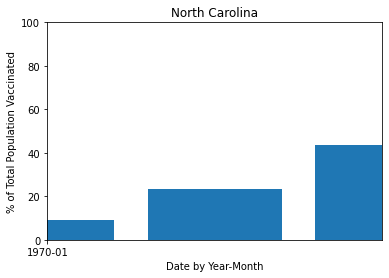

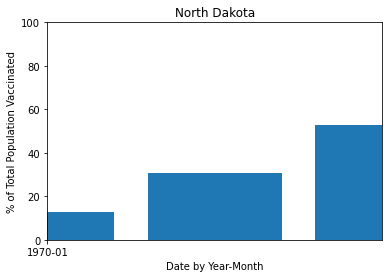

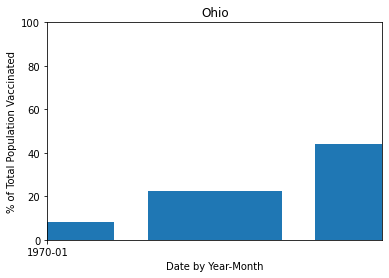

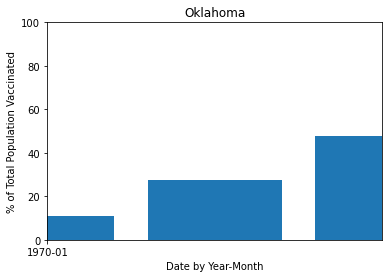

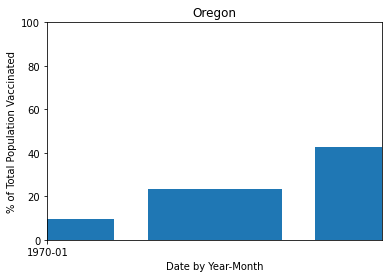

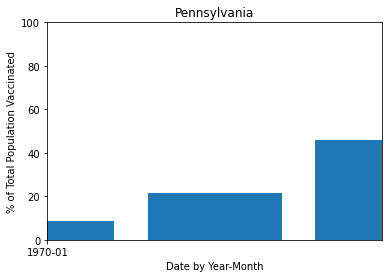

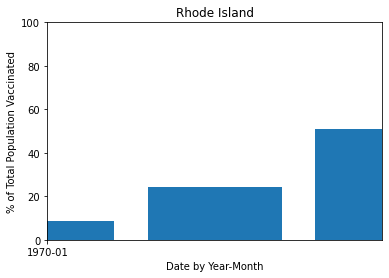

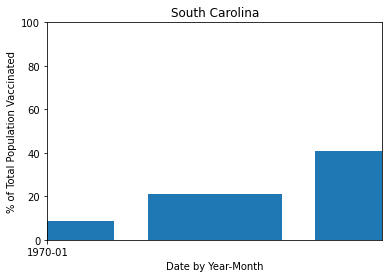

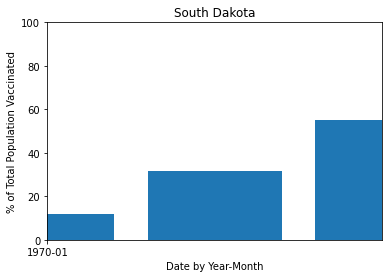

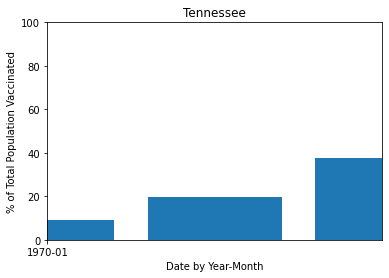

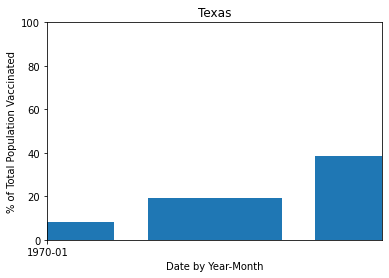

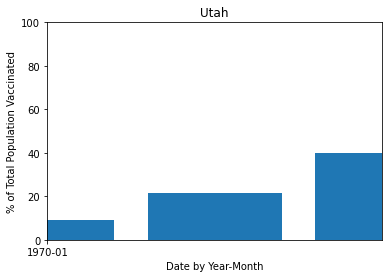

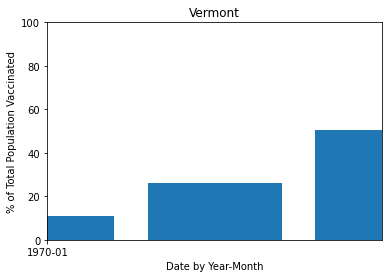

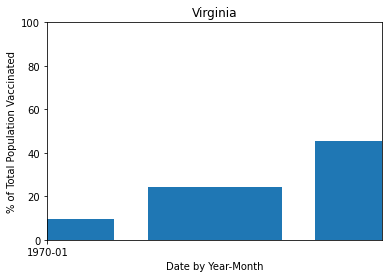

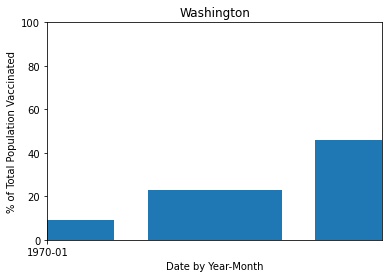

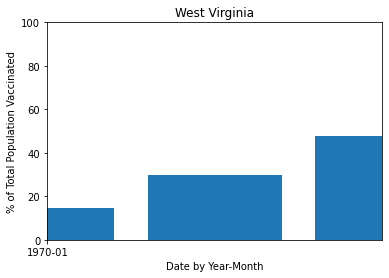

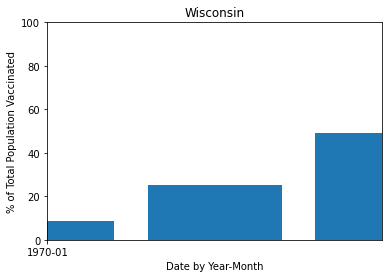

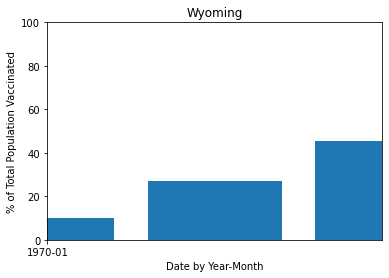

In [510]:
for state in states:
    plot_line_chart(state, df)
    

In [1]:
#plot_line_chart('Alabama', df)

In [529]:
def plot_bar_chart(state, df):
    state_df = df[df['state'] == state]
    state_df = state_df.loc[state_df.groupby('month').date.idxmax()]
    state_df['date'] = state_df['date'].apply(lambda x: x.strftime('%Y-%m')) 
    plt.bar(state_df['date'], state_df['total_per_vac']*100)
    plt.xlabel('Date by Year-Month')
    plt.ylabel('% of Total Population Vaccinated')
    plt.title(state)
    plt.ylim(0, 100)
    #plt.savefig(state)
    plt.show()


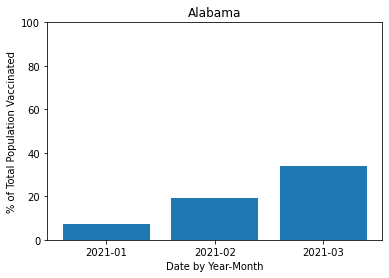

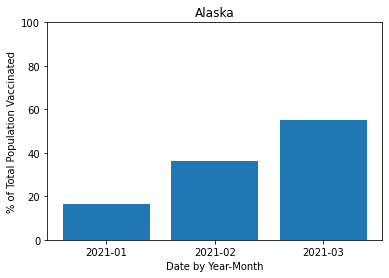

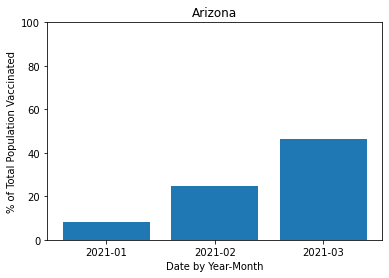

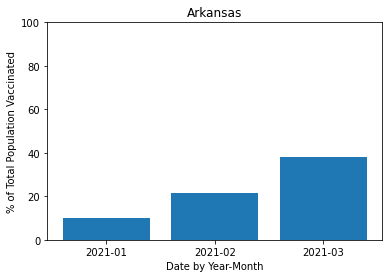

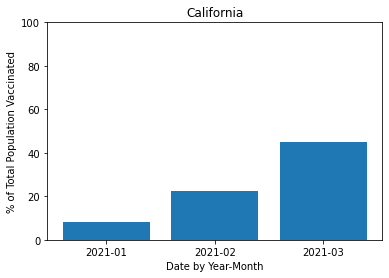

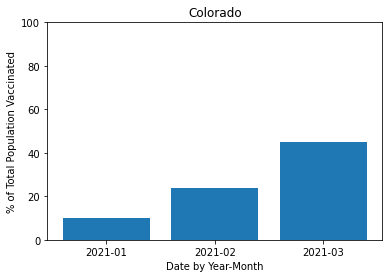

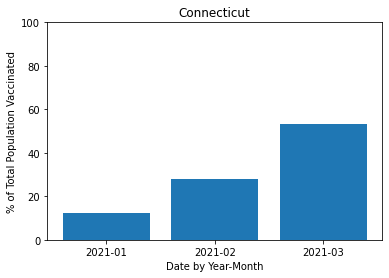

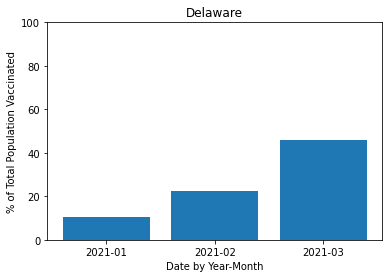

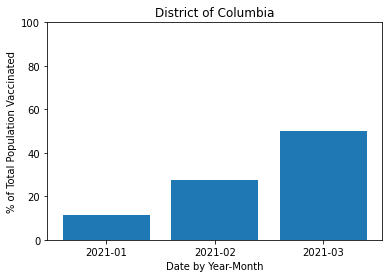

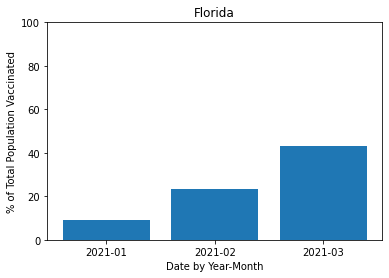

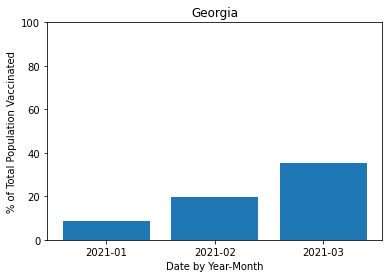

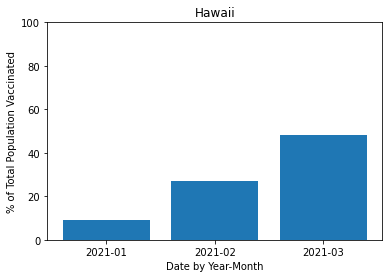

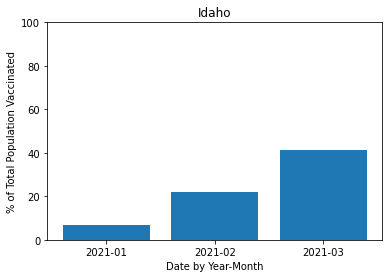

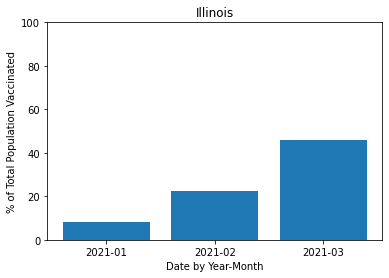

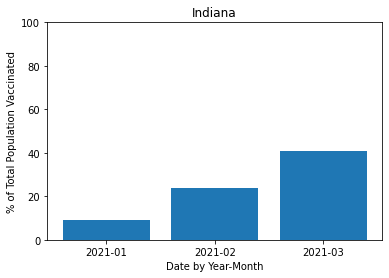

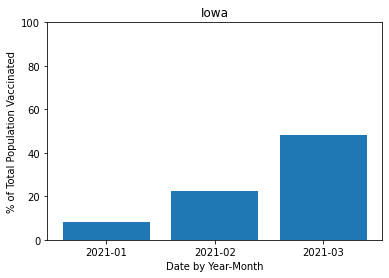

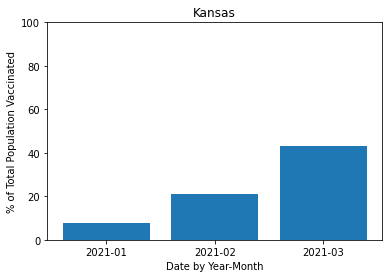

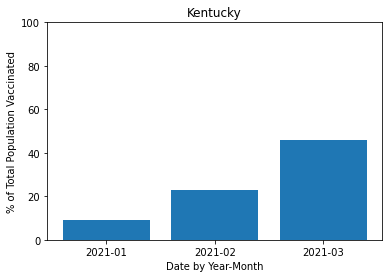

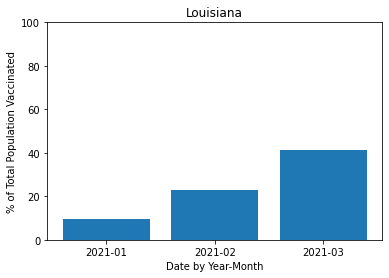

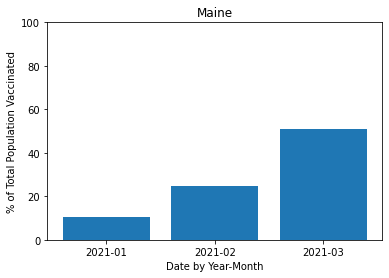

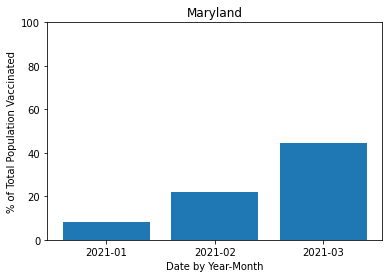

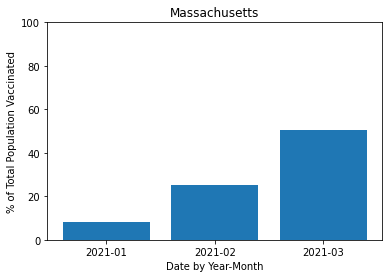

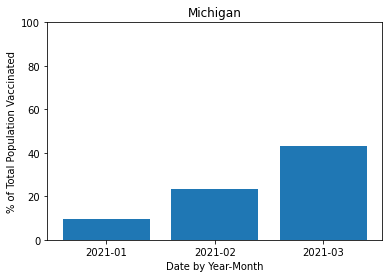

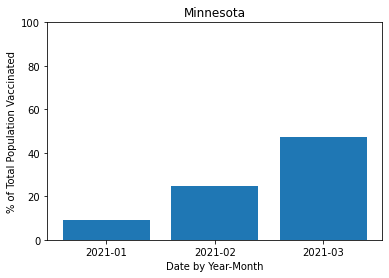

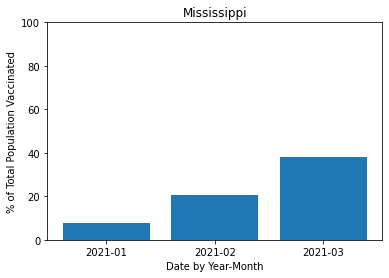

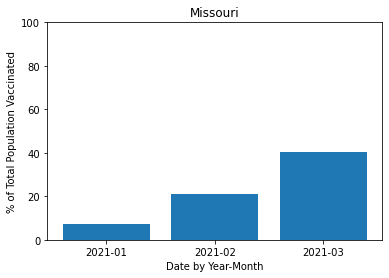

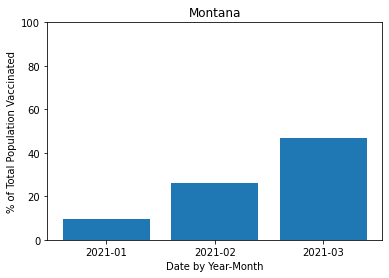

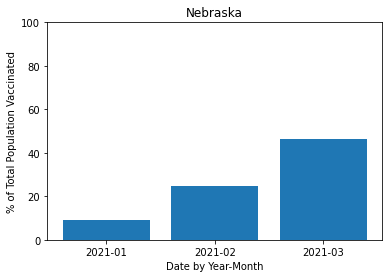

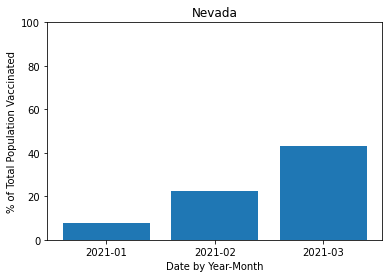

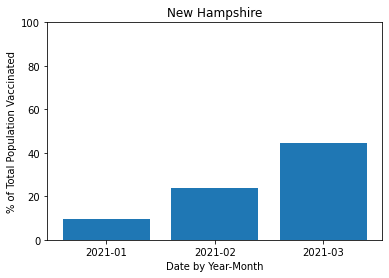

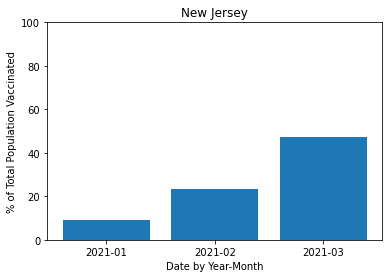

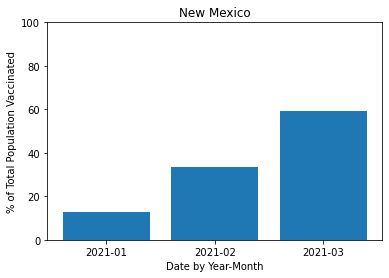

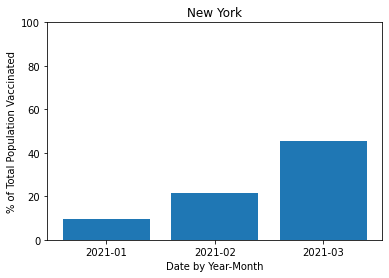

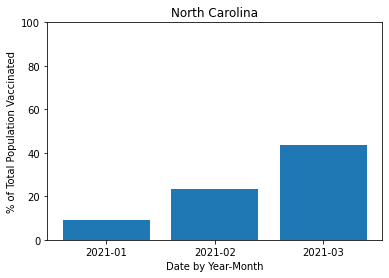

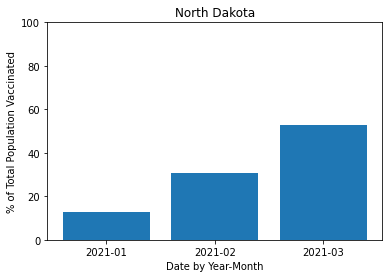

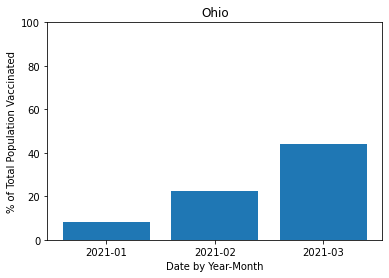

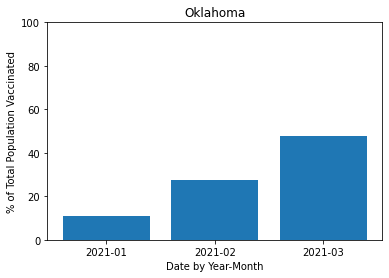

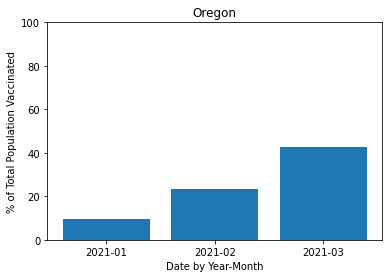

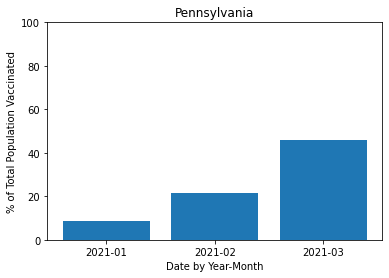

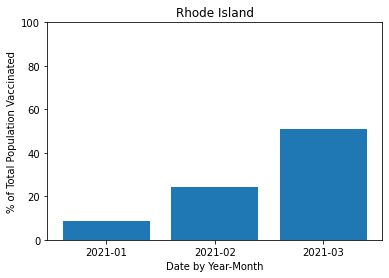

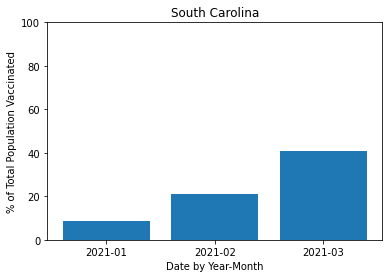

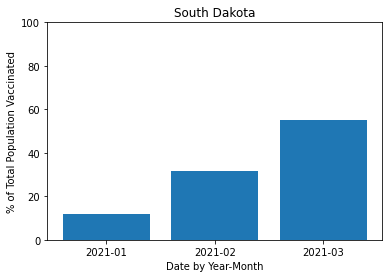

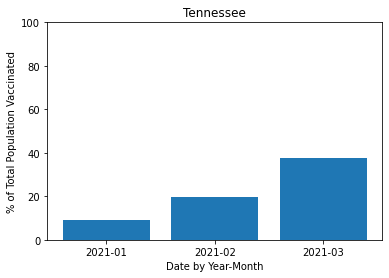

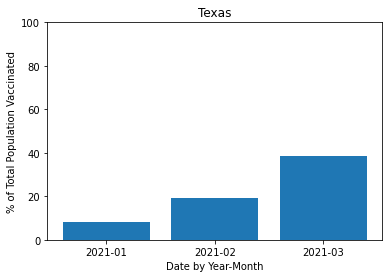

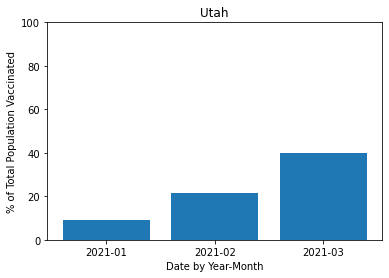

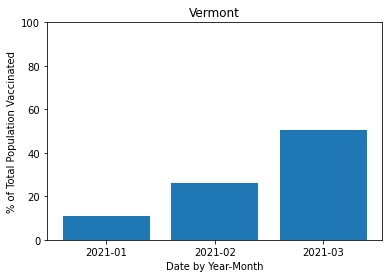

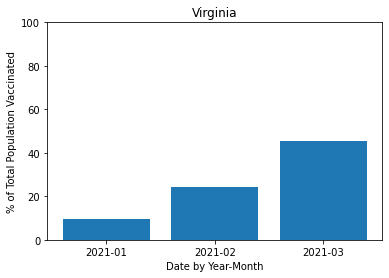

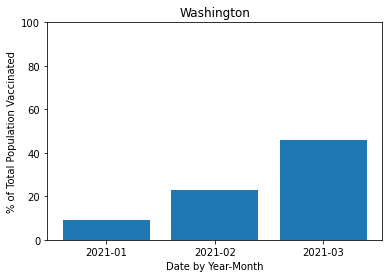

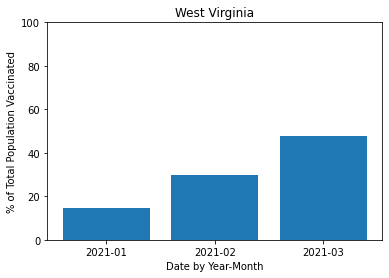

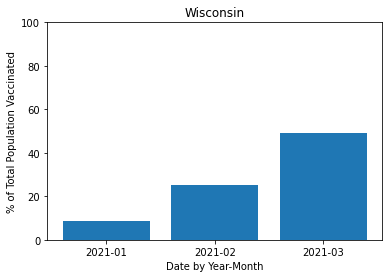

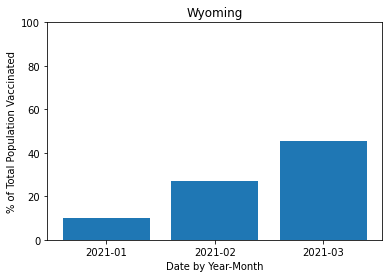

In [530]:
for state in states:
    plot_bar_chart(state, df)
    print()